Given a bank customer, build a neural network-based classifier that can determine whether 
they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data. 
4. Initialize and build the model. Identify the points of improvement and implement the same. 
5. Print the accuracy score and confusion matrix (5 points)

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn import metrics
df=pd.read_csv("C:\\Users\\Owner\\Desktop\\Machine Learning BE\\Practical\\Practical Data Sets\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df.shape


(10000, 14)

In [66]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [67]:
# input data
x=df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']]
# output data
y=df[ 'Exited']

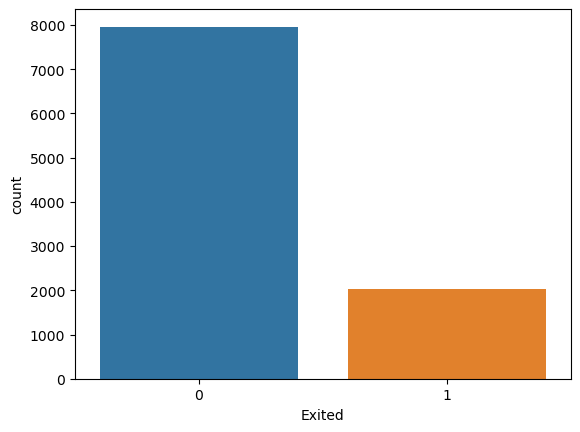

In [68]:
sns.countplot(x=y);

In [69]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [70]:
# Normalise
from sklearn.preprocessing import StandardScaler

In [71]:
Scaler =StandardScaler()

In [72]:
x_scaled=Scaler.fit_transform(x)

In [73]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [77]:
x.shape


(10000, 8)

In [78]:
x_train.shape

(7500, 8)

In [79]:
x_test.shape

(2500, 8)

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
ann= MLPClassifier(hidden_layer_sizes=(100,100,100),random_state = 0, max_iter=100,activation ='relu')

In [82]:
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [83]:
y_pred = ann.predict(x_test)

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [85]:
y_test.value_counts()

0    1991
1     509
Name: Exited, dtype: int64

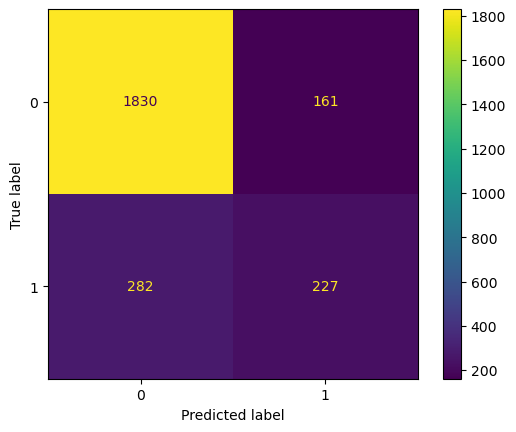

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [87]:
accuracy_score(y_test,y_pred)

0.8228

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500



In [89]:
!pip install imbalanced-learn

In [90]:
from imblearn.over_sampling import RandomOverSampler

In [91]:
ros = RandomOverSampler (random_state =0)

In [92]:
x_res,y_res = ros.fit_resample(x,y)

In [93]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [94]:
# Normalise
from sklearn.preprocessing import StandardScaler

In [95]:
Scaler =StandardScaler()

In [96]:
x_scaled=Scaler.fit_transform(x_res)

In [97]:
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y_res,random_state=0,test_size=0.25)

In [100]:
x_res.shape


(15926, 8)

In [101]:
from sklearn.neural_network import MLPClassifier

In [102]:
ann= MLPClassifier(hidden_layer_sizes=(100,100,100),random_state = 0, max_iter=100,activation ='relu')

In [103]:
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [104]:
y_pred = ann.predict(x_test)

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [106]:
y_test.value_counts()

1    2001
0    1981
Name: Exited, dtype: int64

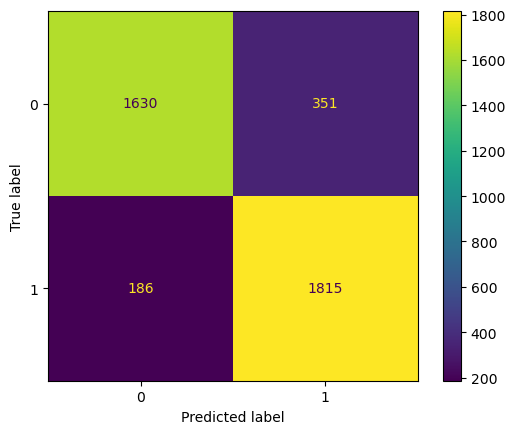

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [108]:
accuracy_score(y_test,y_pred)

0.865143144148669

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982

